In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display
import email
import random
import string
import nltk
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [ ]:

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Enron/' 

Mounted at /content/gdrive


In [ ]:

filepath = "/content/gdrive/MyDrive/Enron/data.csv"
# Read the data into a pandas dataframe called emails

new_emails_b = pd.read_csv(filepath)

In [ ]:
#new_emails = pd.read_csv(filepath)
#new_emails_b = new_emails.drop(new_emails[new_emails["X-Folder"] == 'meetings'].index)

In [ ]:
df_meeting = new_emails_b[new_emails_b['class'] == 0]
df_other = new_emails_b[new_emails_b['class'] == 1]

In [ ]:
meetings_list = df_meeting['Message-Body'].tolist()
others_list = df_other['Message-Body'].tolist()

In [ ]:
filtered_meeting = ("").join(meetings_list) 
filtered_meeting = filtered_meeting.lower()

In [ ]:
filtered_other = ("").join(others_list)
filtered_other = filtered_other.lower()

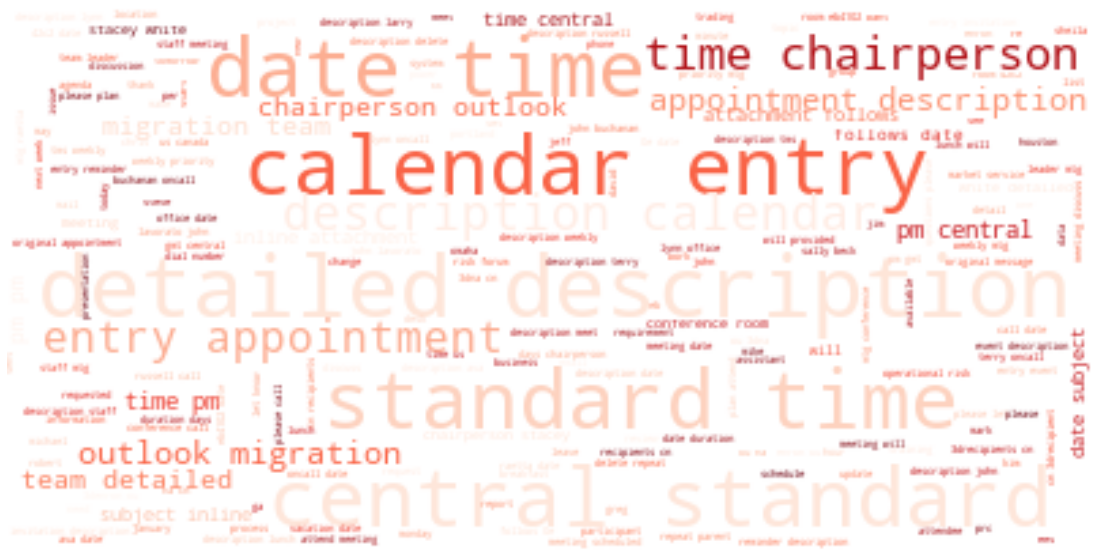

In [ ]:
#create and generate a word cloud image
#WordCloud is a technique to show which words are the most frequent among the given text.
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_meeting)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

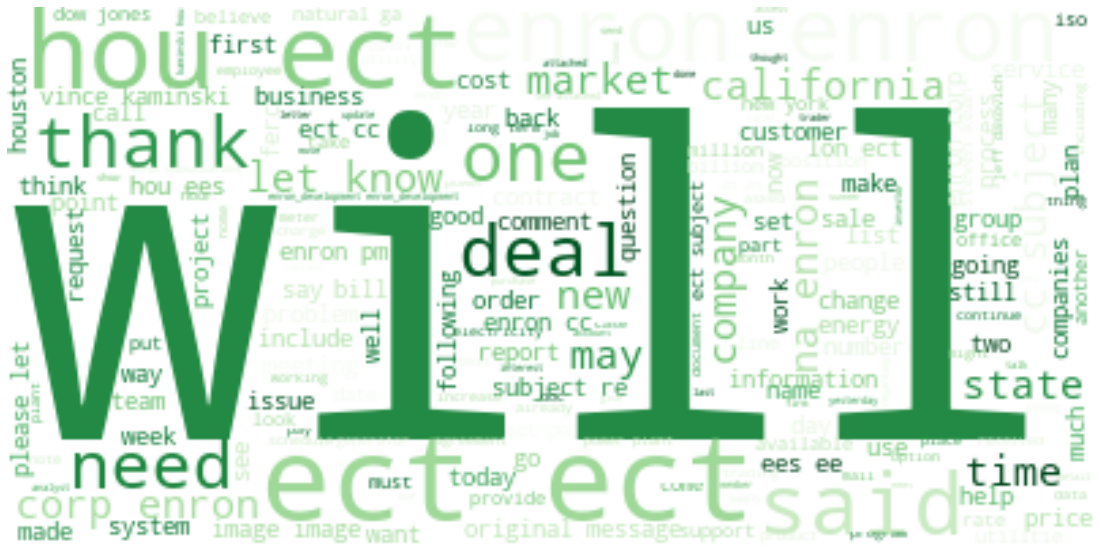

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_other)
 
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

In [ ]:
employee_list = new_emails_b.employee.unique().tolist()

In [ ]:
custom_stopwords = ['enron', 'corp', 'hou'] + employee_list

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(new_emails_b['Message-Body'], new_emails_b['class'], test_size = 0.1, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)


rows in test set: (756,)
rows in train set: (6801,)


pandas.core.series.Series

Vectorize Corpus:

In [ ]:
# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
x_train_lst = x_train.tolist()
vectorizer = TfidfVectorizer(input= x_train_lst , lowercase=True, stop_words='english')
features_train_transformed = vectorizer.fit_transform(x_train_lst) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

Multinomial Naive Bayes:

In [ ]:
# train a classifier
MNB_classifier = MultinomialNB()
MNB_classifier.fit(features_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
MNB_labels = MNB_classifier.predict(features_test_transformed)

actual = y_test.tolist() 
predicted = MNB_labels 
conf_mat = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(conf_mat) 
acc = accuracy_score(actual, predicted)
print ('Accuracy: %.3f'% acc) 
print(100*'-')
print()
print ('Classification report : ')
print (classification_report(actual, predicted) )

f_score = f1_score(actual, predicted, average = 'binary')
print(100*'-')
print('F1 Score: %.3f' % f_score)

Confusion Matrix :
[[285  88]
 [  3 380]]
Accuracy: 0.880
----------------------------------------------------------------------------------------------------

Classification report : 
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       373
           1       0.81      0.99      0.89       383

    accuracy                           0.88       756
   macro avg       0.90      0.88      0.88       756
weighted avg       0.90      0.88      0.88       756

----------------------------------------------------------------------------------------------------
F1 Score: 0.893


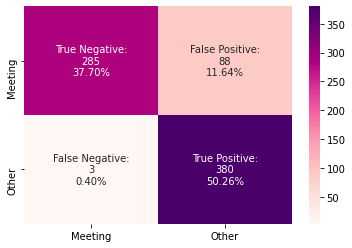

In [ ]:
ax= plt.subplot()
names = ['True Negative:','False Positive:','False Negative:','True Positive:']
counts = ["{0:0.0f}".format(i) for i in conf_mat.flatten()]
percentages = ["{0:.2%}".format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels_array = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels_array, fmt='', cmap='RdPu')
ax.xaxis.set_ticklabels(['Meeting', 'Other'])
ax.yaxis.set_ticklabels(['Meeting', 'Other'])
#plt.savefig("gdrive/My Drive/Enron/conf_NB.png")
plt.show()    

Logistic Regression:

In [ ]:
LR_classifier = LogisticRegression(C=0.01)
LR_classifier.fit(features_train_transformed, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
labels = LR_classifier.predict(features_test_transformed)

actual = y_test.tolist() 
predicted = labels 
conf_mat = confusion_matrix(actual, predicted)   
print('Confusion Matrix :')
print(conf_mat) 
acc = accuracy_score(actual, predicted)
print ('Accuracy: %.3f'% acc) 
print(100*'-')
print()
print ('Classification report : ')
print (classification_report(actual, predicted) )
print(100*'-')
f_score = f1_score(actual, predicted, average = 'binary')
print('F1 Score: %.3f' % f_score)

Confusion Matrix :
[[189 184]
 [  0 383]]
Accuracy: 0.757
----------------------------------------------------------------------------------------------------

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.51      0.67       373
           1       0.68      1.00      0.81       383

    accuracy                           0.76       756
   macro avg       0.84      0.75      0.74       756
weighted avg       0.84      0.76      0.74       756

----------------------------------------------------------------------------------------------------
F1 Score: 0.806


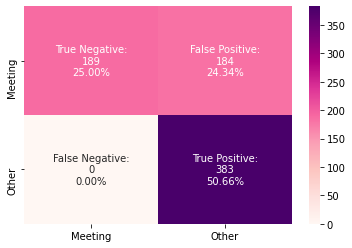

In [ ]:
ax= plt.subplot()
names = ['True Negative:','False Positive:','False Negative:','True Positive:']
counts = ["{0:0.0f}".format(i) for i in conf_mat.flatten()]
percentages = ["{0:.2%}".format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels_array = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels_array, fmt='', cmap= 'RdPu')
ax.xaxis.set_ticklabels(['Meeting', 'Other'])
ax.yaxis.set_ticklabels(['Meeting', 'Other'])
#plt.savefig("gdrive/My Drive/Enron/conf_LR.png")
plt.show()

Feed Forward Neural Network:


In [ ]:
class FFNN(nn.Module):
  '''
  Single layer FFNN with sigmoid output
  '''
  def __init__(self, in_dim, hidden_dim):
    super().__init__()

    self.in_dim = in_dim
    self.hidden_dim = hidden_dim

    self.Net = nn.Sequential(
        nn.Linear(self.in_dim, self.hidden_dim),
        nn.ReLU(),
        nn.BatchNorm1d(self.hidden_dim),
        nn.Linear(self.hidden_dim, 1),
        nn.Sigmoid(),
        
    )

  def forward(self, input):
    pred = self.Net(input)
    return pred.view(-1)

In [ ]:
in_feattures = features_train_transformed.shape[1]
hidden_dim = 64
num_epochs = 10

model = FFNN(in_feattures, hidden_dim)
model.to(device)

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
x_train = torch.tensor(scipy.sparse.csr_matrix.todense(features_train_transformed)).float()
x_test = torch.tensor(scipy.sparse.csr_matrix.todense(features_test_transformed)).float()

In [ ]:
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)


In [ ]:
y_train= y_train.to(torch.float32)
y_test= y_test.to(torch.float32)

In [ ]:
def binary_acc_score(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = acc * 100
    
    return acc

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

epochs = 25
for e in range(epochs):
    optimizer.zero_grad()

    output = model.forward(x_train)
    loss = loss_function(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        model_pred = model.forward(x_test)
        test_loss = loss_function(model_pred, y_test)
        test_losses.append(test_loss)
        test_accuracy = binary_acc_score(model_pred, y_test.view(*model_pred.shape))
        test_accuracies.append(test_accuracy)

    model.train()

    print(f" ===> Epoch: {e+1}/{epochs} | ",
          f"Training Loss: {train_loss:.3f} | ",
          f"Test Loss: {test_loss:.3f} | ",
          f"Accuracy on Test Set: {test_accuracy:.3f}")

 ===> Epoch: 1/25 |  Training Loss: 0.660 |  Test Loss: 0.659 |  Accuracy on Test Set: 84.656
 ===> Epoch: 2/25 |  Training Loss: 0.156 |  Test Loss: 0.626 |  Accuracy on Test Set: 83.995
 ===> Epoch: 3/25 |  Training Loss: 0.111 |  Test Loss: 0.593 |  Accuracy on Test Set: 85.053
 ===> Epoch: 4/25 |  Training Loss: 0.084 |  Test Loss: 0.559 |  Accuracy on Test Set: 86.640
 ===> Epoch: 5/25 |  Training Loss: 0.066 |  Test Loss: 0.523 |  Accuracy on Test Set: 88.228
 ===> Epoch: 6/25 |  Training Loss: 0.053 |  Test Loss: 0.487 |  Accuracy on Test Set: 89.418
 ===> Epoch: 7/25 |  Training Loss: 0.043 |  Test Loss: 0.451 |  Accuracy on Test Set: 89.947
 ===> Epoch: 8/25 |  Training Loss: 0.036 |  Test Loss: 0.416 |  Accuracy on Test Set: 91.138
 ===> Epoch: 9/25 |  Training Loss: 0.030 |  Test Loss: 0.382 |  Accuracy on Test Set: 91.402
 ===> Epoch: 10/25 |  Training Loss: 0.025 |  Test Loss: 0.350 |  Accuracy on Test Set: 92.196
 ===> Epoch: 11/25 |  Training Loss: 0.022 |  Test Loss: 0.

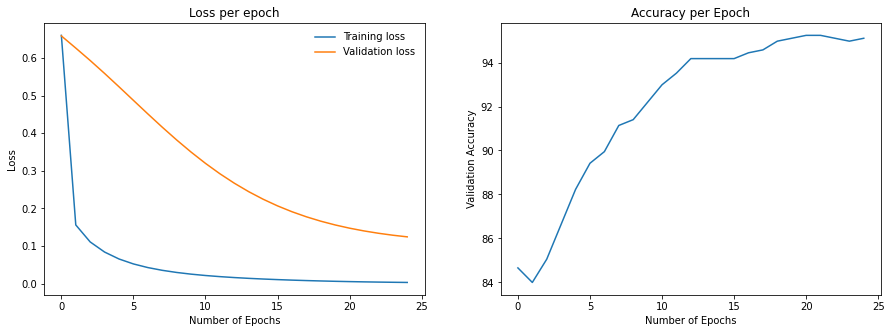

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
plt.title('Loss per epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);
plt.subplot(122)
plt.title('Accuracy per Epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(test_accuracies)
#plt.savefig("/content/gdrive/MyDrive/Enron/learn_ML.png")
plt.show()

In [ ]:
with torch.no_grad():
    model.eval()
    model_pred = model.forward(x_test)
    test_accuracy = binary_acc_score(model_pred, y_test.view(*model_pred.shape))
    predicted = torch.round(model_pred).tolist()
    actual = y_test.tolist()


In [ ]:

conf_mat = confusion_matrix(actual, predicted)   
print('Confusion Matrix :')
print(conf_mat) 
acc = accuracy_score(actual, predicted)
print ('Accuracy: %.3f'% acc) 
print(100*'-')
print()
print ('Classification report : ')
print (classification_report(actual, predicted))
print(100*'-')
f_score = f1_score(actual, predicted, average = 'binary')
print('F1 Score: %.3f' % f_score)

Confusion Matrix :
[[342  31]
 [  6 377]]
Accuracy: 0.951
----------------------------------------------------------------------------------------------------

Classification report : 
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       373
         1.0       0.92      0.98      0.95       383

    accuracy                           0.95       756
   macro avg       0.95      0.95      0.95       756
weighted avg       0.95      0.95      0.95       756

----------------------------------------------------------------------------------------------------
F1 Score: 0.953


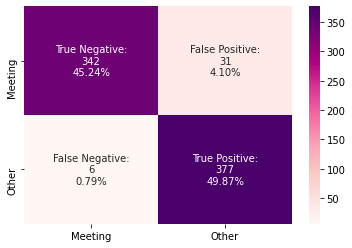

In [ ]:
ax= plt.subplot()
names = ['True Negative:','False Positive:','False Negative:','True Positive:']
counts = ["{0:0.0f}".format(i) for i in conf_mat.flatten()]
percentages = ["{0:.2%}".format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels_array = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels_array, fmt='', cmap= 'RdPu')
ax.xaxis.set_ticklabels(['Meeting', 'Other'])
ax.yaxis.set_ticklabels(['Meeting', 'Other'])
#plt.savefig("gdrive/My Drive/Enron/conf_FFNN.png")
plt.show()

In [ ]:

test1 = ['Dear George. Is it possible to meet on Thursday 10th April at 10pm?']
vec1 = vectorizer.transform(test1)
tens1 = torch.tensor(scipy.sparse.csr_matrix.todense(vec1)).float()
nb_pred = ['meeting' if MNB_classifier.predict(vec1)[0] == 0 else 'other']
lr_pred = ['meeting' if LR_classifier .predict(vec1)[0] == 0 else 'other']
with torch.no_grad():
  model.eval()
  pr = model.forward(tens1)
print(pr)
nn_pred = torch.round(pr).item()

NN_pred = ['meeting' if nn_pred == 0 else 'other']
print('NB predicted:', nb_pred)
print('LR predicted:', lr_pred)
print('FFNN predicted:', NN_pred)


tensor([0.4714])
NB predicted: ['other']
LR predicted: ['other']
FFNN predicted: ['meeting']
